In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time

In [2]:
with open('project_pluto_ephemerides.txt') as f:
    lines = f.readlines()[1:]
ls = list()
for l in lines:
    if l == '\n':
        break
    ls.append(l)
pluto_eph = np.fromstring('\n'.join(ls), sep = ' ').reshape((-1,7))

t = Time(pluto_eph[:,0], format = 'jd', scale = 'tt')

### Interpreting state vectors as ICRF

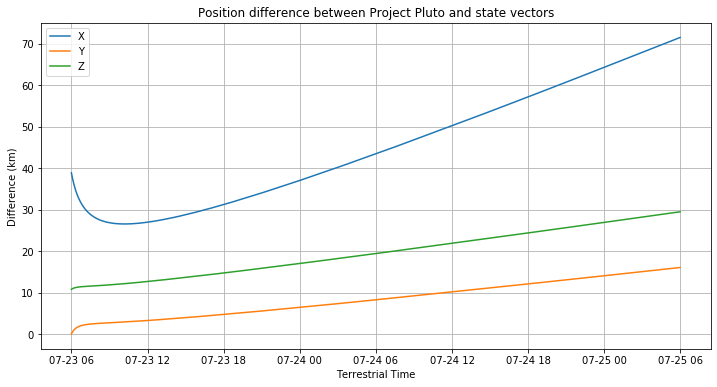

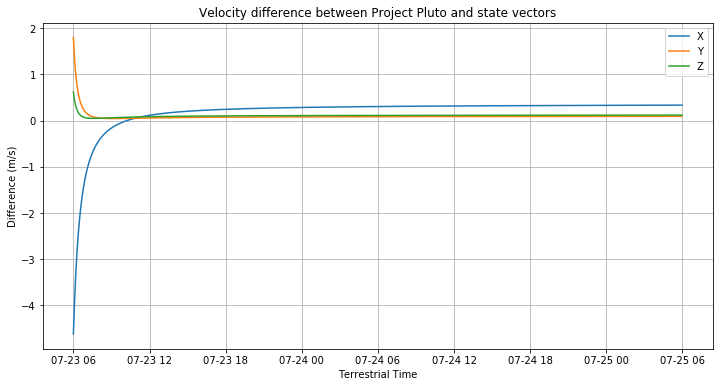

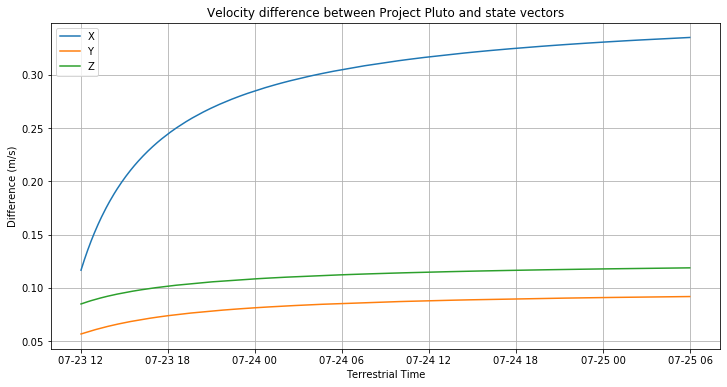

In [3]:
gmat_eph = np.fromfile('state_vectors_20200726_050742_as_ICRF_backprop.txt', sep = ' ').reshape((-1,7))[::-1,:]

gmat_jd = gmat_eph[:, 0] + 2430000.0

gmat_interp = np.empty_like(pluto_eph[:,1:])
for j in range(gmat_interp.shape[1]):
    gmat_interp[:,j] = np.interp(pluto_eph[:,0], gmat_jd, gmat_eph[:,1+j])
    
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(t.datetime, pluto_eph[:,1:4] - gmat_interp[:,0:3]);
plt.title('Position difference between Project Pluto and state vectors')
plt.ylabel('Difference (km)')
plt.xlabel('Terrestrial Time')
plt.legend(['X', 'Y', 'Z'])
plt.grid();

plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(t.datetime, 1e3*(pluto_eph[:,4:] - gmat_interp[:,3:]));
plt.title('Velocity difference between Project Pluto and state vectors')
plt.ylabel('Difference (m/s)')
plt.xlabel('Terrestrial Time')
plt.legend(['X', 'Y', 'Z'])
plt.grid();

sel = t >= Time('2020-07-23T12:00')

plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(t[sel].datetime, 1e3*(pluto_eph[sel,4:] - gmat_interp[sel,3:]));
plt.title('Velocity difference between Project Pluto and state vectors')
plt.ylabel('Difference (m/s)')
plt.xlabel('Terrestrial Time')
plt.legend(['X', 'Y', 'Z'])
plt.grid();

### Interpreting state vectors as J2000

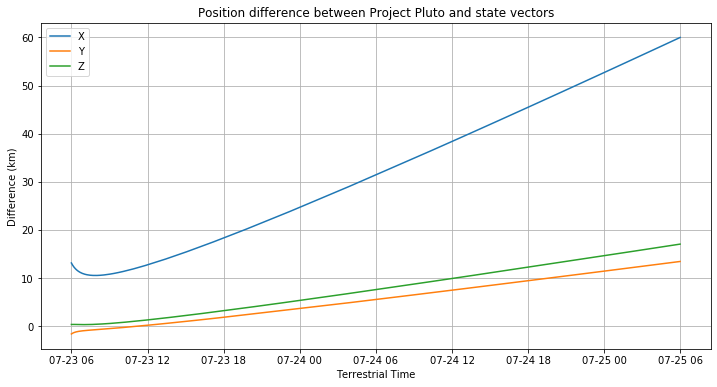

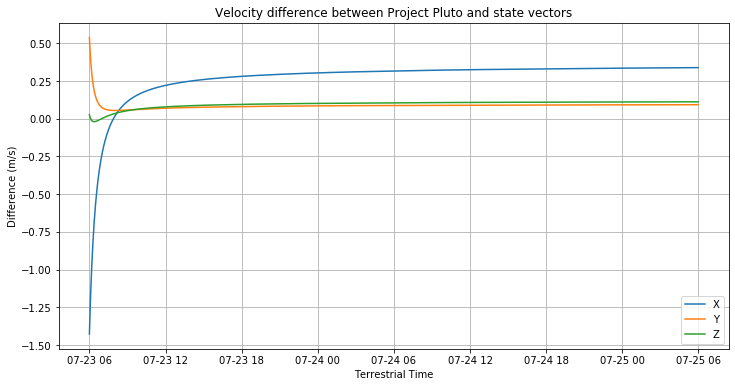

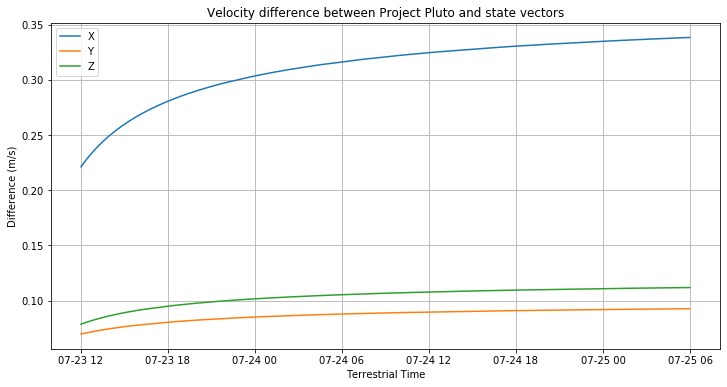

In [4]:
gmat_eph = np.fromfile('state_vectors_20200726_050742_as_J2000_backprop.txt', sep = ' ').reshape((-1,7))[::-1,:]

gmat_jd = gmat_eph[:, 0] + 2430000.0

gmat_interp = np.empty_like(pluto_eph[:,1:])
for j in range(gmat_interp.shape[1]):
    gmat_interp[:,j] = np.interp(pluto_eph[:,0], gmat_jd, gmat_eph[:,1+j])
    
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(t.datetime, pluto_eph[:,1:4] - gmat_interp[:,0:3]);
plt.title('Position difference between Project Pluto and state vectors')
plt.ylabel('Difference (km)')
plt.xlabel('Terrestrial Time')
plt.legend(['X', 'Y', 'Z'])
plt.grid();

plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(t.datetime, 1e3*(pluto_eph[:,4:] - gmat_interp[:,3:]));
plt.title('Velocity difference between Project Pluto and state vectors')
plt.ylabel('Difference (m/s)')
plt.xlabel('Terrestrial Time')
plt.legend(['X', 'Y', 'Z'])
plt.grid();

sel = t >= Time('2020-07-23T12:00')

plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(t[sel].datetime, 1e3*(pluto_eph[sel,4:] - gmat_interp[sel,3:]));
plt.title('Velocity difference between Project Pluto and state vectors')
plt.ylabel('Difference (m/s)')
plt.xlabel('Terrestrial Time')
plt.legend(['X', 'Y', 'Z'])
plt.grid();